### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [422]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Import the necessary packages - 2.5 marks

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [424]:
data  = pd.read_csv('Data.csv')

item  = pd.read_csv('item.csv')

user  = pd.read_csv('user.csv')

##data .head(5)
##item .head(5)
##user .head(5)

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [457]:
data.info()
data.shape
data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


<bound method NDFrame.describe of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [462]:
item.info()
item.shape
item.describe
item.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie id      1681 non-null   float64
 1   movie title   1681 non-null   object 
 2   release date  1681 non-null   object 
 3   unknown       1681 non-null   float64
 4   Action        1681 non-null   float64
 5   Adventure     1681 non-null   float64
 6   Animation     1681 non-null   float64
 7   Childrens     1681 non-null   float64
 8   Comedy        1681 non-null   float64
 9   Crime         1681 non-null   float64
 10  Documentary   1681 non-null   float64
 11  Drama         1681 non-null   float64
 12  Fantasy       1681 non-null   float64
 13  Film-Noir     1681 non-null   float64
 14  Horror        1681 non-null   float64
 15  Musical       1681 non-null   float64
 16  Mystery       1681 non-null   float64
 17  Romance       1681 non-null   float64
 18  Sci-Fi        1681 non-null   flo

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1676,1678.0,Mat' i syn,1998-02-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,1679.0,B. Monkey,1998-02-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1678,1680.0,Sliding Doors,1998-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1679,1681.0,You So Crazy,1994-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,1682.0,Scream of Stone (Schrei aus Stein),1996-03-08 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [427]:
user.info()
user.shape
user.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


<bound method NDFrame.describe of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

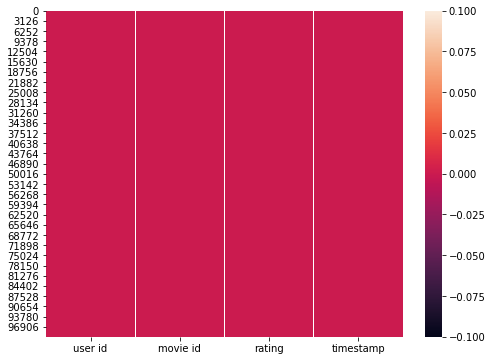

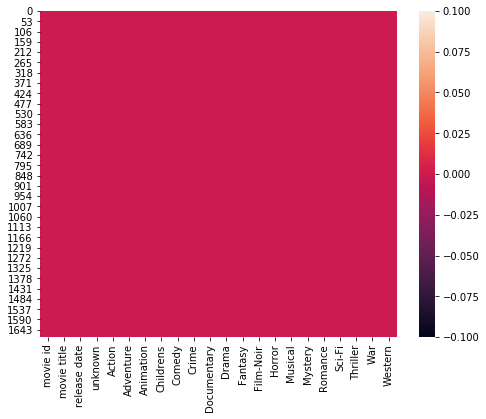

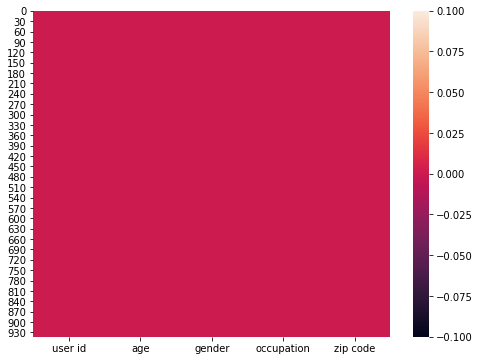

In [463]:
# Check missing values via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.isna())
plt.show()

# Check missing values via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(item.isna())
plt.show()

# Check missing values via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(user.isna())
plt.show()

#### 4. Find the number of movies per genre using the item data - 5 marks

In [464]:
item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [465]:
# use sum on the default axis
item[item ==1].sum(axis=0)

movie id          1.0
movie title       0.0
release date      0.0
unknown           1.0
Action          251.0
Adventure       135.0
Animation        42.0
Childrens       122.0
Comedy          505.0
Crime           109.0
Documentary      50.0
Drama           725.0
Fantasy          22.0
Film-Noir        24.0
Horror           92.0
Musical          56.0
Mystery          61.0
Romance         247.0
Sci-Fi          101.0
Thriller        251.0
War              71.0
Western          27.0
dtype: float64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [466]:
#hint: use sum on the axis = 1
##newItem = item.drop(['movie id'], axis=1)
##newItem['Genre Total'] = newItem[newItem ==1].sum(axis=1)
##newItem[newItem['Genre Total'] > 1]

##Item = item.drop(columns=[‘movie_title’, ‘relaease_Date’]).sum(axis=1)
#item[item[‘genre Total’] > 1][[‘movie title’, ‘Genre Total']]

item['genre Total'] = item.drop(columns=['movie title','movie id']).sum(axis=1)
item[item['genre Total']>1][['movie id', 'genre Total']]


,movie id,genre Total
0,1.0,3.0
1,2.0,3.0
3,4.0,3.0
4,5.0,3.0
6,7.0,2.0
...,...,...
1667,1669.0,3.0
1668,1670.0,2.0
1671,1673.0,2.0
1677,1679.0,2.0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [467]:
newItem.drop(newItem[newItem.unknown ==1].index, inplace=True)
newItem

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre Total,Genre Total
0,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,24,3.0
1,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,24,3.0
2,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,8,1.0
3,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,24,3.0
4,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,24,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,1.0
1677,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,16,2.0
1678,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,16,2.0
1679,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8,1.0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [433]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

##year = item['release date']
##item.release date.str.split("-").str[0].tolist()

brown
brown
brown


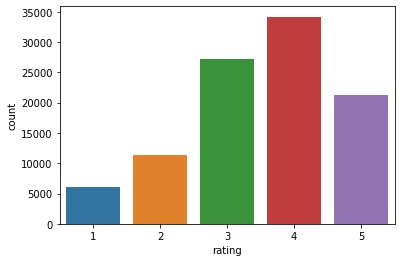

In [434]:
#your answers here
sns.countplot(data['rating'])


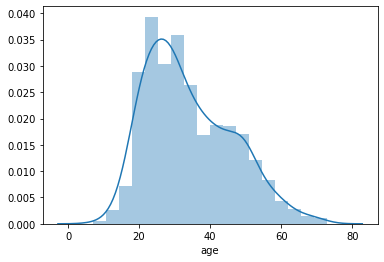

In [435]:
#your answers here

sns.distplot(user['age'])


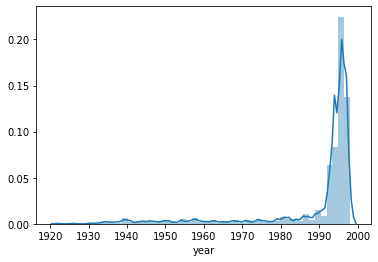

In [468]:
#your answers here

item['release date'] = pd.to_datetime(item['release date'])
item['year'] = pd.DatetimeIndex(item['release date']).year
item['month'] = pd.DatetimeIndex(item['release date']).month

##item.head()

sns.distplot(item['year'])


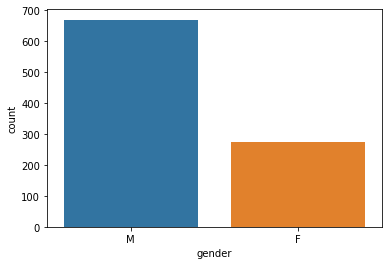

In [437]:
#your answers here
sns.countplot(user['gender'])
##sns.countplot(user['occupation']

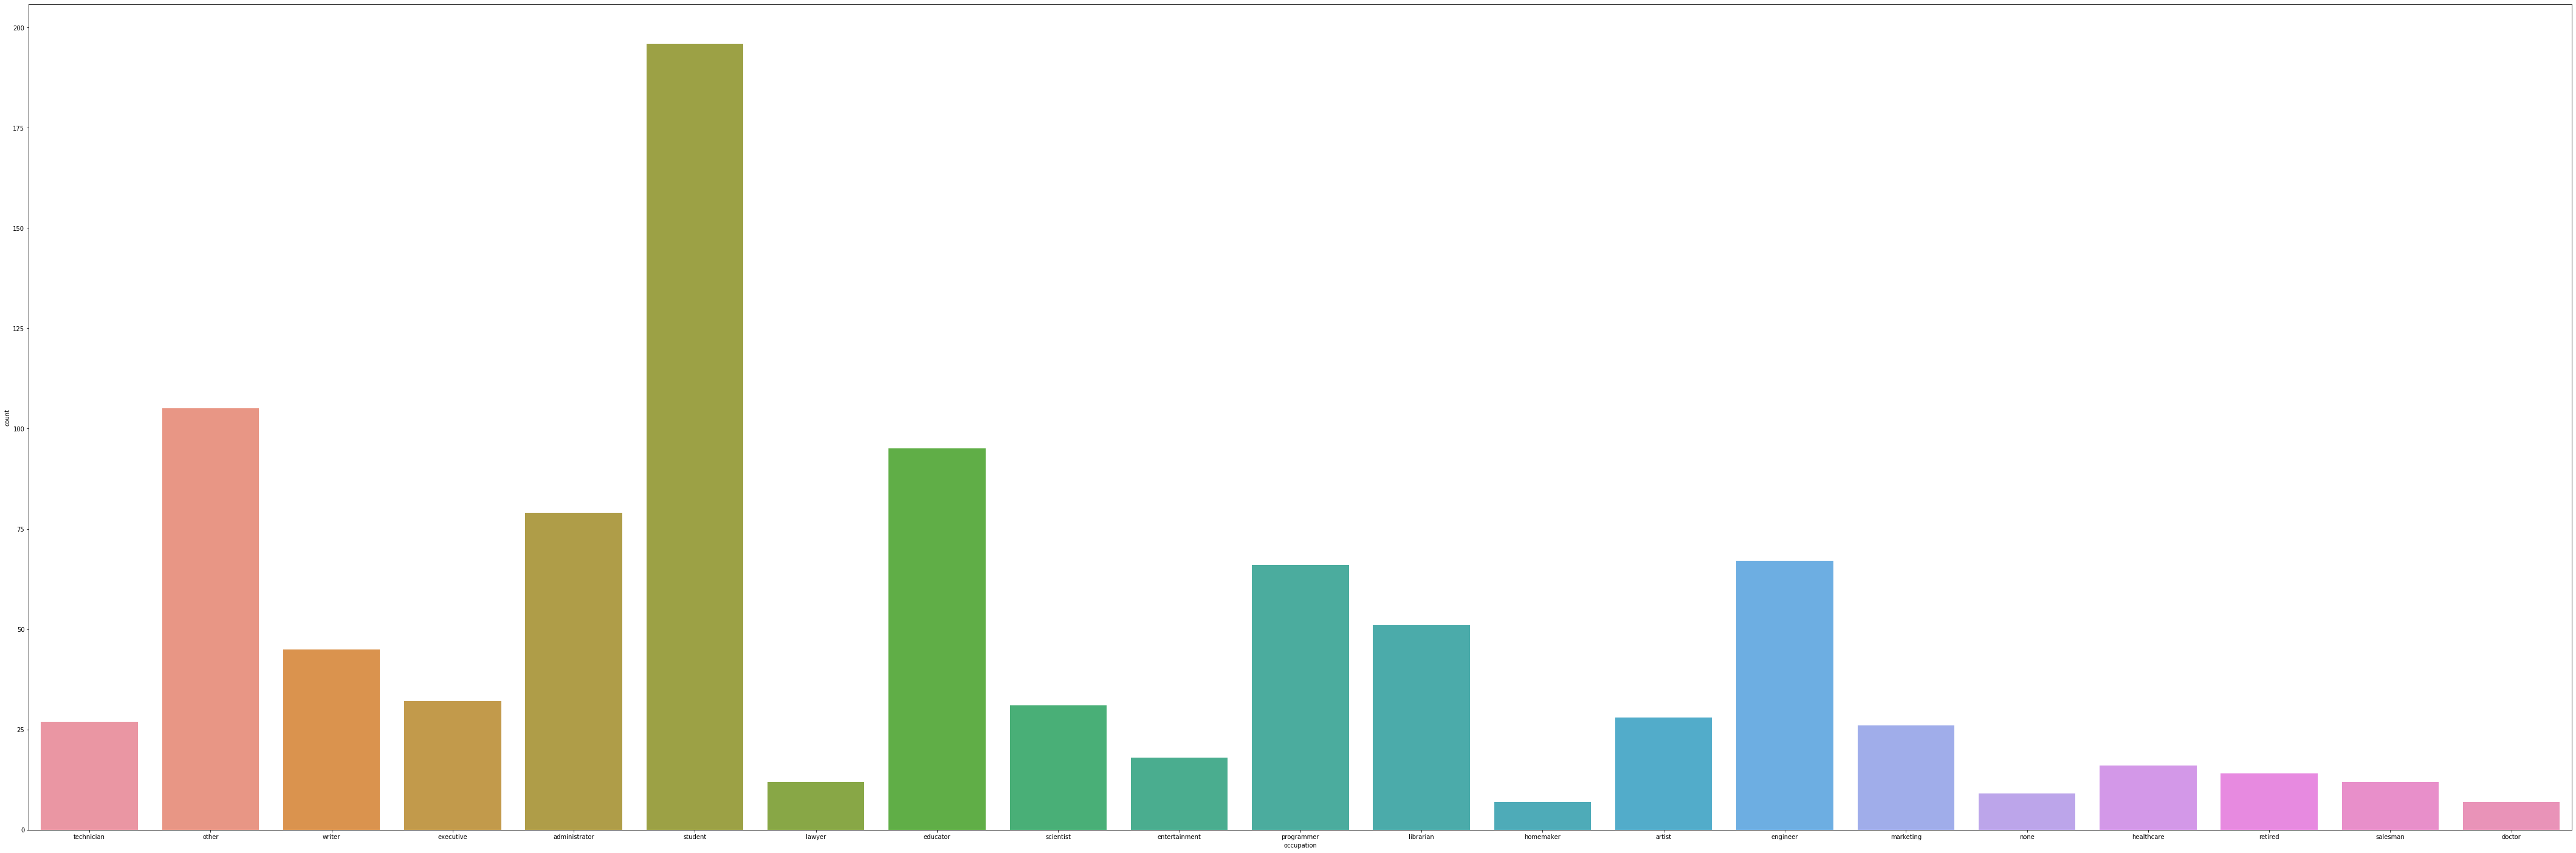

In [438]:
#your answers here
plt.figure(figsize=(75,25))
sns.countplot(user['occupation'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [446]:
#Your answer here
##groupby(column=.select_dtypes('').columns)

newItem2 = item

newItem2.drop(['genre_Total'])

newItem2.loc['genre_Total',:] = item.drop(columns=['movie title','movie id', 'release date']).sum(axis=0)

newItem2.tail()

##item['Genre_Total'] = item.sum(axis=1)
##grouped = item.groupby(by=['Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary','Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western','genre Total','year'])['year'].agg(['sum']).reset_index()

##grouped.tail()
##heatmap_data = pd.pivot_table(grouped, values='genre Total', 
                     ##index=['year'], 
                     ##columns='Action', 'Adventure')

##sns.heatmap(heatmap_data, cmap="YlGnBu")
##mergedDf.head()
##item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre Total,year,month,genre_Total
1677,1679.0,B. Monkey,1998-02-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1998.0,2.0,2004.0
1678,1680.0,Sliding Doors,1998-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1998.0,1.0,2003.0
1679,1681.0,You So Crazy,1994-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1994.0,1.0,1997.0
1680,1682.0,Scream of Stone (Schrei aus Stein),1996-03-08 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1996.0,3.0,2001.0
genre_Total,NaN,NaN,NaN,3.0,753.0,405.0,126.0,366.0,1515.0,327.0,...,183.0,741.0,303.0,753.0,213.0,81.0,8676.0,10032474.0,13464.0,10063290.0


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [523]:
#your answer here

mergedDf = data.merge(item, how='left')
mergedDf.head()

grouped = mergedDf.groupby('movie title').agg({'rating':sum})
grouped.sort_values(by=['rating'], inplace=True, ascending=False)
grouped.head(25)


,rating
movie title,
Star Wars,2541
Fargo,2111
Return of the Jedi,2032
Contact,1936
Raiders of the Lost Ark,1786
"Godfather, The",1769
"English Patient, The",1759
Toy Story,1753
"Silence of the Lambs, The",1673


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:

